# Đồ án cuối kì: Lập trình cho khoa học dữ liệu

Họ tên: Nguyễn Phúc Mạnh

MSSV: 1712590

## Import

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Lấy dữ liệu

Dữ liệu được dùng trong đồ án này là file "books.csv" đính kèm; đây là dữ liệu về sách trên trang web [goodreads.com](https://www.goodreads.com/), một trang web nơi mọi người chia sẻ với nhau về sách. Dữ liệu này được lấy từ [kaggle](https://www.kaggle.com/jealousleopard/goodreadsbooks), tác giả đã dùng Goodreads API để lấy dữ liệu.

In [3]:
## Khám phá dữ liệu

In [4]:
### Đọc dữ liệu từ file csv vào dataframe

In [5]:
raw_df = pd.read_csv('books.csv', error_bad_lines = False) #loại bỏ các dòng có định dạng sai
df = raw_df.copy()
df.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột? 

In [7]:
num_rows, num_cols = df.shape

In [8]:
print('Số dòng: {}\nSố cột: {}'.format(num_rows, num_cols))

Số dòng: 11123
Số cột: 12


### Mỗi dòng và mỗi cột có ý nghĩa gì?

Mô tả về mỗi cột của dữ liệu:
- `bookID` id riêng cho mỗi cuốn sách              
- `title    `      tên sách 
- `authors `            tác giả 
- `average_rating  `    điểm đánh giá trung bình (dùng thang đo 1-5 sao)
- `isbn     `           cũng là id (International Standard Book Number).
- `isbn13`             cũng là id, nhưng 13 số :) 
- `language_code `      ngôn ngữ gốc của cuốn sách
- `num_pages`         số trang
- `ratings_count `      tổng số lượt đánh giá (bằng sao)
- `text_reviews_count`  tổng số đánh giá bằng chữ (bằng comment)
- `publication_date`    ngày xuất bản
- `publisher`      nhà xuất bản   

Mỗi dòng mô tả thông tin về một cuốn sách





### Mỗi cột  có dtype là gì?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Nhận xét:
- Không có cột nào có giá trị thiếu.
- Ta chỉ cần chuyển dữ liệu ở  cột publilcation_date về kiểu dữ liệu datetime. Trước khi làm vậy ta cần kiểm tra xem ở trong cột publication_data có chứa kiểu dữ liệu gì.

In [10]:
def open_object_dtype(s):
    dtypes = set()
    for i in s:
        dtypes.add(type(i))
    return dtypes

In [11]:
open_object_dtype(df['publication_date'])

{str}

Ta thấy cột publication_date chưa kiểu str, nên có thể chuyển về kiểu datetime dễ dàng.

## Tiền xử lý

### Lược bỏ cột dư thừa

Ta thấy có tới 3 cột dùng để đặt id cho sách, chúng ta có thể bỏ bớt 2 cột `isbn` và `isbn13`, chỉ cần mỗi cột `bookID` là đủ.

In [12]:
df = df.drop(columns = ['isbn','isbn13'])

### Đổi tên cột

Bỏ dấu space dư thừa trong tên cột 

In [13]:
df.rename(columns=lambda x: x.replace(' ', ''), inplace= True)

### Chuyển dtype của cột "publication_date" sang datetime

In [14]:
df['publication_date']

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 11123, dtype: object

Vì ở đây có 2 dòng dữ liệu có thời gian ko hợp lệ nên ta thêm errors = 'coerce' để biến chúng thành NaT

In [15]:

df['publication_date'] = pd.to_datetime(df['publication_date'],format = '%m/%d/%Y', errors = 'coerce')


In [16]:
open_object_dtype(df['publication_date'])

{pandas._libs.tslibs.nattype.NaTType, pandas._libs.tslibs.timestamps.Timestamp}

Kiểm tra 2 dòng dữ liệu có ngày tháng sai:

In [17]:
for i in range(num_rows):
    if type(df['publication_date'][i]) == pd.pandas._libs.tslibs.nattype.NaTType:
        print(i,raw_df.iloc[i]) #vì df ở 2 dòng đó ngày tháng là NaT nên ta dùng raw_df
        print()


8177 bookID                                                            31373
title                 In Pursuit of the Proper Sinner (Inspector Lyn...
authors                                               Elizabeth  George
average_rating                                                      4.1
isbn                                                         0553575104
isbn13                                                    9780553575101
language_code                                                       eng
  num_pages                                                         718
ratings_count                                                     10608
text_reviews_count                                                  295
publication_date                                             11/31/2000
publisher                                                  Bantam Books
Name: 8177, dtype: object

11094 bookID                                                          45531
title                      M

Chúng ta có thể thấy ngày 31/11 và 31/6 không tồn tại.  
Vậy chúng ta có sửa lại thành 30/11 và 30/6 (hoặc 31/10, 31/12 và 31/5, 31/7).  


In [18]:
raw_df.iloc[[8177],[10]] = '11/30/2000'
raw_df.iloc[[11094],[10]] = '6/30/1982'

Giờ chuyển lại cột `publication_date`

In [19]:
df['publication_date'] = pd.to_datetime(raw_df['publication_date'],format = '%m/%d/%Y')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   language_code       11123 non-null  object        
 5   num_pages           11123 non-null  int64         
 6   ratings_count       11123 non-null  int64         
 7   text_reviews_count  11123 non-null  int64         
 8   publication_date    11123 non-null  datetime64[ns]
 9   publisher           11123 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 869.1+ KB


## Khám phá dữ liệu

### Các cột dạng numeric và datetime có miền giá trị như thế nào?

Có 5 cột dạng numberic và 1 cột dạng datetime.Cột `bookID` chúng ta bỏ qua, ta tính min, max, mean của 4 cột `average_rating`, `num_pages`, `ratings_count`, `text_reviews_count`, cột `publication_date` ta cho mean = NaN

In [21]:
df.describe()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,6576.000000,4.597666e+06,94265.000000


In [22]:
col_ranges_df = df.describe().iloc[[1,3,7],[1,2,3,4]]
col_ranges_df['publication_date'] =[np.nan,df['publication_date'].min(),df['publication_date'].max()]
pd.set_option('display.float_format', lambda x: '%.4f' % x) # bỏ định dạng e cho dễ nhìn hơn
col_ranges_df

,average_rating,num_pages,ratings_count,text_reviews_count,publication_date
mean,3.9341,336.4056,17942.8481,542.0481,NaT
min,0.0000,0.0000,0.0000,0.0000,1900-01-01
max,5.0000,6576.0000,4597666.0000,94265.0000,2020-03-31


Nhìn qua hàng `mean` ta có thể thấy được:
- `average_rating` = 3.9, rất gần với 5, cho thấy đa số sách ở `goodreads` đều được đánh giá cao 
- Chênh lệch giữ rating_count và test_reviews_count rất lớn chứng tỏ rất ít người viết comment review sách mà đa phần là đánh giá bằng sao


## Đưa ra các câu hỏi cần trả lời


- Số lượng sách được viết của mỗi ngôn ngữ
- Top 10 sách được đánh giá nhiều nhất
- Top 10 sách có số lượng comment cao nhất
- Top 10 sách có điểm trung bình đánh giá cao nhất
- Top 10 sách dài nhất
- Tác giả viết nhiều nhất
- Top 10 tác giả được đánh giá cao nhất

## Phân tích dữ liệu để trả lời cho các câu hỏi 

### Phân phối điểm đánh giá trung bình
Ta gom nhóm theo cột `average_rating` rồi đếm số giá trị.


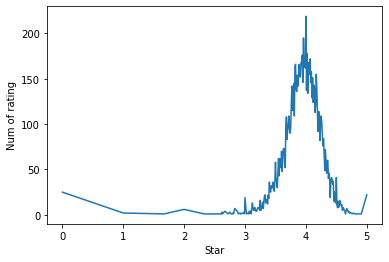

In [50]:
df.groupby('average_rating')['bookID'].count().plot(kind = 'line').set(xlabel = 'Star', ylabel = 'Num of rating');

Nhận xét:  
- Ta thấy phân phối điểm đánh giá trung bình vào khoảng 4/5, cho thấy đa phần sách trong bộ dữ liệu đều được đánh giá tốt. 

### Số lượng sách được viết của mỗi ngôn ngữ
Ta gom nhóm theo cột `language_code` rồi đếm số giá trị.


In [24]:
book_lan = df.groupby("language_code").agg('size').sort_values(ascending = False)[:10]
book_lan

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
dtype: int64

10530
94.66870448619976 %


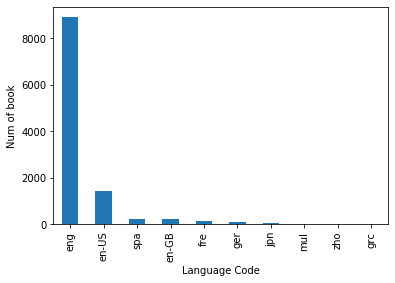

In [105]:
book_lan.plot(kind = 'bar').set(xlabel = 'Language Code', ylabel = 'Num of book');
total_eng_book = book_lan['eng']+book_lan['en-US']+book_lan['en-GB']
print(total_eng_book)
print(total_eng_book/num_rows*100,'%')

Nhìn vào biểu đồ và kết quả ở trên, ta thấy số sách viết bằng tiếng Anh là `10530` chiếm phần rất lớn (95%) so với phần còn lại trong bộ dữ liệu.

### Top 10 sách được đánh giá nhiều nhất

Sắp xếp giảm dần theo cột `ratings_count`

In [54]:
top_rating_count = df.sort_values(by =['ratings_count'], ascending = False)[:10]
top_rating_count

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.5900,eng,501,4597666,94265,2006-09-06,Little Brown and Company,2006
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.2700,eng,366,2530894,32871,2002-08-15,Houghton Mifflin,2002
1462,5107,The Catcher in the Rye,J.D. Salinger,3.8000,eng,277,2457092,43499,2001-01-30,Back Bay Books,2001
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.8900,eng,736,2418736,21303,2006-04-01,Pocket Books,2006
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.5600,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.4200,eng,341,2293963,34692,1999-06-02,Arthur A. Levine Books / Scholastic Inc.,1999
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.4900,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.3600,eng,398,2128944,13670,2003-09-05,Houghton Mifflin Harcourt,2003
2114,7613,Animal Farm,George Orwell,3.9300,eng,122,2111750,29677,2003-05-06,NAL,2003
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.5700,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006


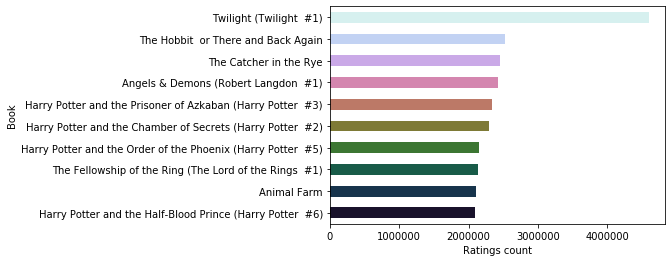

In [98]:
top_rating_count.set_index('title')['ratings_count'].sort_values().plot(kind = 'barh',color=sns.color_palette('cubehelix',10)).set(xlabel = 'Ratings count', ylabel = 'Book');

- Cuốn Twilight được nhiều lượt đánh giá nhất nhưng điểm trung bình của nó lại thấp hơn mức trung bình của toàn bộ sách.
- Có đến 4 tập truyện Harry Potter trong phần này

### Top 10 sách có số lượng comment nhiều nhất

Sắp xếp giảm dần theo cột `text_reviews_count`

In [107]:
top_comment_book = df.sort_values(by =['text_reviews_count'], ascending = False)[:10]
top_comment_book

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.5900,eng,501,4597666,94265,2006-09-06,Little Brown and Company,2006
5270,19063,The Book Thief,Markus Zusak,4.3700,eng,552,1516367,86881,2006-03-14,Alfred A. Knopf,2006
1069,3636,The Giver (The Giver #1),Lois Lowry,4.1300,eng,208,1585589,56604,2006-01-24,Ember,2006
284,865,The Alchemist,Paulo Coelho,3.8600,eng,197,1631221,55843,1993-05-01,HarperCollins,1993
10700,43641,Water for Elephants,Sara Gruen,4.0900,eng,335,1260027,52759,2007-05-01,Algonquin Books,2007
7309,28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.2500,eng,375,1766725,47951,2006-03-01,Disney Hyperion Books,2006
5407,19501,Eat Pray Love,Elizabeth Gilbert,3.5500,eng,368,1362264,47620,2007-02-01,Riverhead Books,2007
2060,7445,The Glass Castle,Jeannette Walls,4.2700,eng,288,808656,46176,2006-01-17,Scribner,2006
1462,5107,The Catcher in the Rye,J.D. Salinger,3.8000,eng,277,2457092,43499,2001-01-30,Back Bay Books,2001
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.5600,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004


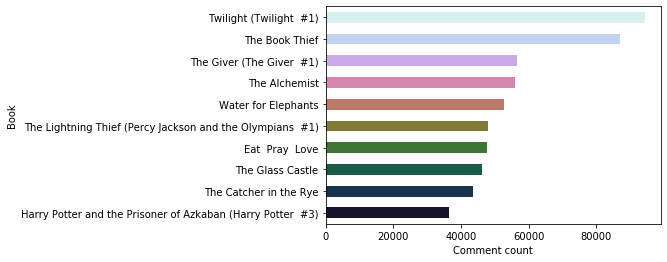

In [111]:
top_comment_book.set_index('title')['text_reviews_count'].sort_values().plot(kind = 'barh',color=sns.color_palette('cubehelix',10)).set(xlabel = 'Comment count', ylabel = 'Book');

- Cuốn Twilight lại xuất hiện ở vị trí thứ nhất, gấp 3 lượt comment so với cuốn The Book Thief ở vị trí thứ 2

### Top 10 sách có điểm trung bình đánh giá cao nhất

Sắp xếp giảm dần theo cột `average_rating`

In [28]:
df.sort_values(by =['average_rating'], ascending = False)[:10]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0000,grc,364,0,0,1922-02-22,Oxford University Press USA
9893,39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5.0000,eng,240,2,0,2007-10-16,Multnomah
4788,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0000,eng,74,5,3,2006-02-01,Square One Publishers
9324,36853,Tyrannosaurus Wrecks (Stanley #1),Laura Driscoll/Alisa Klayman-Grodsky/Eric ...,5.0000,eng,24,2,1,2003-02-01,Disney Press
9720,38804,The Irish Anatomist: A Study of Flann O'Brien,Keith Donohue,5.0000,eng,222,1,0,2003-07-25,Academica Press
4933,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0000,eng,202,4,0,1975-01-01,Vantage Press
6775,25426,Delwau Duon: Peintiadau Nicholas Evans = Symph...,Nicholas Evans/Rhonda Evans,5.0000,wel,150,1,0,1987-06-22,Y Lolfa
9282,36492,Oliver Wendell Holmes in Paris: Medicine Theo...,William C. Dowling,5.0000,eng,179,1,1,2007-02-28,University Press of New England
786,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0000,eng,83,1,0,2006-09-01,Schirmer Mosel
4125,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0000,eng,128,2,0,2003-03-06,BradyGames


Rõ ràng là ta không thể dựa vào bảng này để đánh giá các cuốn sách trên là hay được bởi vì số lượt đánh giá của chúng quá ít.  
Thay vì vậy, ta có thể thêm vào điều kiện số lượt đánh giá bằng sao và comment nhiều hơn trung bình.


In [29]:
high_rating_book = df[(df['ratings_count'] >= 17943) & (df['text_reviews_count'] >= 543)].sort_values(by =['average_rating'], ascending = False)
high_rating_book.shape

(1244, 10)

Bằng cách trên ta đã lọc được 9/10 sách chưa đạt tiêu chuẩn.   
Top 10 cuốn sách có điểm trung bình đánh giá cao nhất:

In [30]:
high_rating_book.head(10)

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6587,24812,The Complete Calvin and Hobbes,Bill Watterson,4.8200,eng,1456,32213,930,2005-09-06,Andrews McMeel Publishing
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.7300,eng,3342,28242,808,2005-09-12,Scholastic
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.5900,eng,1728,101233,1550,2012-09-25,Ballantine Books
4968,17961,Collected Fictions,Jorge Luis Borges/Andrew Hurley,4.5800,eng,565,18874,791,1999-09-30,Penguin Classics Deluxe Edition
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.5700,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.5600,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
10675,43509,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,4.5600,eng,636,18754,906,2000-07-08,Bloomsbury
4244,15195,The Complete Maus,Art Spiegelman,4.5500,eng,296,111475,5966,2003-10-02,Penguin Books
6691,25101,Season of Mists (The Sandman #4),Neil Gaiman/Matt Wagner/George Pratt/Dick Gior...,4.5400,eng,217,50951,1038,1999-03-10,Vertigo
6694,25104,The Wake (The Sandman #10),Neil Gaiman/Michael Zulli/Jon J. Muth/Charles ...,4.5200,eng,191,37038,767,1999-09-03,Vertigo


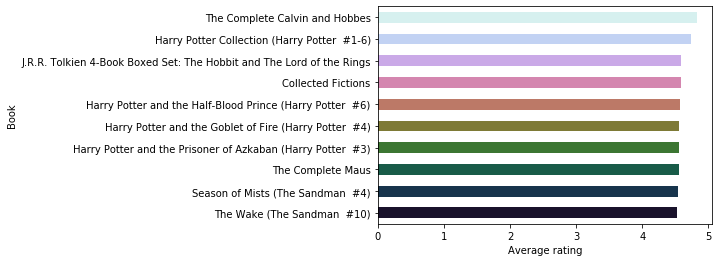

In [115]:
high_rating_book.head(10).set_index('title')['average_rating'].sort_values().plot(kind = 'Paired',color=sns.color_palette('cubehelix',10)).set(xlabel = 'Average rating', ylabel = 'Book');

- Harry Potter áp đảo với 4/10 tác phẩm lọt vào danh sách
- Các cuốn sách trong danh sách trên đều là thể loại truyện/ truyện tranh 

### Top 10 sách dài nhất

Sắp xếp giảm dần theo cột `num_pages`



In [116]:
top_long_book = df.sort_values(by =['num_pages'], ascending = False)[:10]
top_long_book

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.7000,eng,6576,1338,81,2004-10-17,W. W. Norton Company,2004
6802,25587,The Second World War,Winston S. Churchill,4.4500,eng,4736,1493,99,1986-05-09,Mariner Books,1986
10906,44613,Remembrance of Things Past (Boxed Set),Marcel Proust,4.3400,eng,3400,6,1,1981-03-05,Chatto & Windus,1981
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.7300,eng,3342,28242,808,2005-09-12,Scholastic,2005
6822,25709,Summa Theologica 5 Vols,Thomas Aquinas,4.1200,eng,3020,2734,84,1981-01-01,Christian Classics,1981
7862,30258,Harrison's Principles of Internal Medicine,Dennis L. Kasper,4.3500,eng,2751,23,4,2004-07-27,McGraw-Hill Medical Publishing,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.7800,eng,2690,41428,164,2004-09-13,Scholastic,2004
10749,43888,The Sword of Truth Boxed Set I: Wizard's Firs...,Terry Goodkind,4.2900,en-US,2480,4196,81,1998-11-15,Tor Books,1998
6257,23589,The J.R.R. Tolkien Companion and Guide,Christina Scull,4.6400,eng,2264,45,0,2006-11-02,Houghton Mifflin Harcourt,2006
5614,20749,Study Bible: NIV,Anonymous,4.7000,eng,2198,4166,186,2002-10-01,Zondervan Publishing House,2002


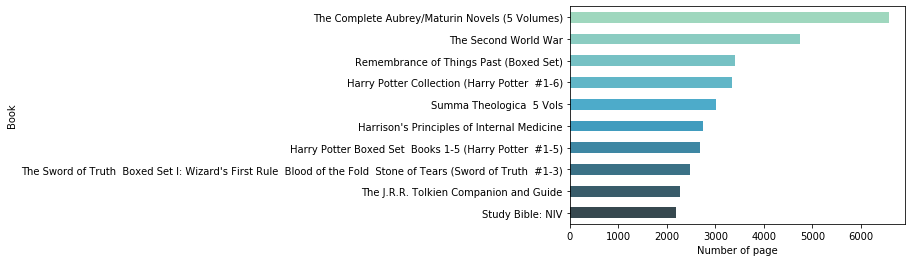

In [119]:
top_long_book.set_index('title')['num_pages'].sort_values().plot(kind = 'barh',color=sns.color_palette('Paired',10)).set(xlabel = 'Number of page', ylabel = 'Book');

- Các cuốn sách trong danh sách trên quá nhiều trang, nhưng có 1 điều đáng lưu ý nhiều cuống tổng hợp nhiều tập lại chỉ trong 1 cuốn sách nên mới dài như vậy
- Đa phần các cuốn sách dài đều có số lượng lượt đánh giá thấp, so với trung bình là `17942.8481`, có thể do mọi người ngại đọc do dài quá.  

### Tác giả viết nhiều nhất


Ta gom nhóm theo cột `authors` và đếm số lượng.  
Trước đó ta phải xử lý cột `authors`, vì dữ liệu trong cột `authors` có thể gồm tác giả và những dịch giả sau dấu '/'.

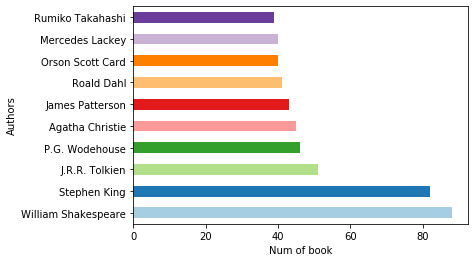

In [128]:
col_author = df['authors'].str.extract(r'(.+?)/|(.+)').fillna('') # lấy phần tác giả trước dấu '/'
df['authors'] = col_author[0].astype(str) + col_author[1].astype(str)
df.groupby('authors').agg('size').sort_values(ascending = False).head(10).plot(kind = 'barh',color=sns.color_palette('Paired',10)).set(ylabel="Authors", xlabel="Num of book"); 

Đứng đầu là William Shakespeare và Stephen King với hơn 80 cuốn sách!

### Top sách có điểm trung bình cao nhất của 10 tác giả kể trên

In [131]:
top_author = list(df.groupby('authors').agg('size').sort_values(ascending = False).head(10).index)
df[df['authors'].isin(top_author)]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.5900,eng,1728,101233,1550,2012-09-25,Ballantine Books,2012
22,31,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,4.5000,eng,1184,1710,91,2004-10-21,Houghton Mifflin Harcourt,2004
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.3600,eng,398,2128944,13670,2003-09-05,Houghton Mifflin Harcourt,2003
24,35,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,4.5000,en-US,1216,1618,140,2002-10-01,Houghton Mifflin Harcourt,2002
420,1417,The Complete Pelican Shakespeare,William Shakespeare,4.5000,eng,1808,578,25,2002-11-07,Viking,2002
...,...,...,...,...,...,...,...,...,...,...,...
10979,45030,Bedlam's Bard (Bedlam Bard #1-2),Mercedes Lackey,3.9500,eng,617,3016,30,2006-06-30,Baen Books,2006
11004,45161,The Roald Dahl Audio Collection,Roald Dahl,4.4100,en-US,4,199,36,2007-02-20,HarperCollins Publishers,2007
11005,45169,Step on a Crack (Michael Bennett #1),James Patterson,4.0100,eng,383,37552,1592,2007-02-06,Little Brown and Company,2007
11101,45568,El Superzorro,Roald Dahl,4.0500,spa,96,174,20,2000-06-01,Alfaguara Infantil,2000


In [35]:
df[df['title'].isin(["魔戒首部曲：魔戒現身"])]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4261,15294,魔戒首部曲：魔戒現身,J.R.R. Tolkien,4.3600,zho,608,26,0,2001-12-20,聯經出版事業股份有限公司


### Phân bố sách phát hành theo từng năm


Để trả lời câu hỏi này ta cần thêm một cột `year` vào df

In [132]:
def year(a):
    return a.year
df['year'] = df['publication_date'].apply(year)

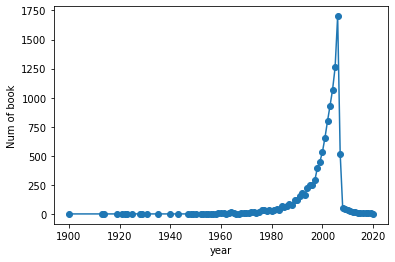

In [38]:
year_df = df.groupby('year')['bookID'].count()
year_df.plot(kind = 'line', marker = 'o').set(ylabel = 'Num of book');

Nhìn vào biểu đồ có thể thấy số sách được xuất bản tăng nhanh chóng những năm đầu thế kỷ 21, rồi lại tụt rất nhanh.  
Rất có thể do sự tác động của Internet làm giảm số lượng sách hoặc số người đọc sách.

Nhận xét về bộ dữ liệu:
- Bộ dữ liệu có những dòng chưa đúng định dạng nên bị lọc đi trong quá trình đọc file
- Cột `publication_date` có 2 dòng bị lỗi ngày tháng 
- Không có cột thể loại sách, một cột rất quan trọng trong việc đánh giá sách